# Importing Necessary Packages

In [2]:
import numpy as np #python library for working with arrays
import pandas as pd # for working with datasets

#Graphs
import matplotlib.pyplot as plt #visualization
from matplotlib import pyplot #visualization 
%matplotlib inline 
#static images of your plot embedded in the workbook

#For splitting the train and test data
from sklearn.model_selection import train_test_split

#For Sampling
from sklearn.utils import resample

#XGBoost Algorithm
import xgboost as xgb

#Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.options.display.max_colwidth = 150 #to extend the maximum width of the output display

# Reading the Dataset

In [4]:
data = pd.read_csv('../data/aug_train.csv')

In [5]:
data.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
5,295775,Female,25,1,25.0,1,< 1 Year,No,27954.0,152.0,23,0
6,71711,Male,51,1,8.0,0,1-2 Year,Yes,2630.0,26.0,209,0
7,331781,Male,38,1,28.0,1,1-2 Year,No,2630.0,26.0,51,0
8,290704,Female,45,1,28.0,0,1-2 Year,Yes,55873.0,124.0,262,0
9,344792,Male,42,1,28.0,0,1-2 Year,Yes,27801.0,122.0,217,1


Basic Data Preprocessing

In [6]:
data.isnull().sum().sum() #checking for null values

0

In [7]:
data.dtypes #checking the data types of the various columns

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [8]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,154.189429,0.163811
std,139527.487326,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,83.735107,0.370104
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115006.250000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,81.000000,0.000000
50%,230461.500000,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,154.000000,0.000000
75%,345434.750000,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
data = pd.get_dummies(data, ['Gender', 'Vehicle_Age', 'Vehicle_Damage']) #one-hot-encoding for Categorical Columns

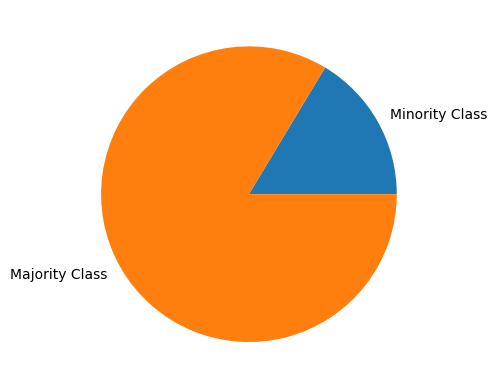

In [10]:
class_division = [ data[data['Response'] == 1 ].shape[0], data[data['Response'] == 0 ].shape[0] ]
my_labels = ['Minority Class', 'Majority Class']

plt.pie(class_division, labels = my_labels)
plt.show()

In [11]:
print("Proportion of Minority Class: " + str(round(data[data['Response'] == 1 ].shape[0]/data.shape[0] * 100, 2)) + "%")

Proportion of Minority Class: 16.38%


In [12]:
from sklearn.model_selection import train_test_split #splitting the data into train and test

X = data.drop(columns= ['id', 'Response']) #Columns to be excluded from training set
y = data['Response'] #defining the Response as y

X.columns = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Gender_Female',
       'Gender_Male', 'Vehicle_Age_1_2_Year', 'Vehicle_Age_lessthan_1_Year',
       'Vehicle_Age_greaterthan_2_Years', 'Vehicle_Damage_No', 'Vehicle_Damage_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# splitting the data into train and test. Note that here, we have used stratify = y, so that the class imbalances are properly 
# replicated in our train and test dataset. The data is split in a 70-30 ratio of train:test.

In [13]:
print("Proportion of Minority Class in train set: " + str(round(y_train.sum()/len(y_train) * 100, 2)) + "%")
print("Proportion of Minority Class in test set: " + str(round(y_test.sum()/len(y_test) * 100, 2)) + "%")

Proportion of Minority Class in train set: 16.38%
Proportion of Minority Class in test set: 16.38%


# Building a Basic XGBoost Model

In [14]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [15]:
test = xgb_classifier.predict(X_test)

In [16]:
print("Accuracy of Test Set:", round(accuracy_score(y_test,test) * 100, 2 ), "%")

Accuracy of Test Set: 84.58 %


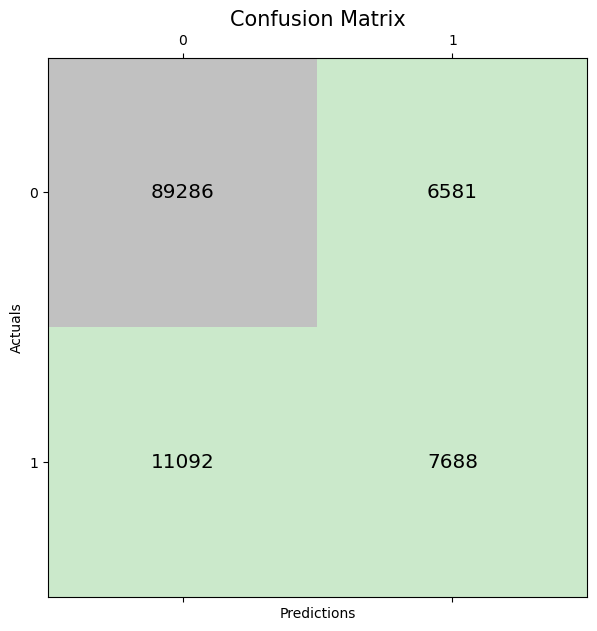

In [17]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=test)

fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [18]:
precision_original =  round(precision_score(y_test, test), 4)
recall_original = round(recall_score(y_test, test), 4)
F1_score_original =  round(f1_score(y_test, test), 4)
metrics_original = [precision_original, recall_original, F1_score_original]

original = pd.DataFrame(metrics_original)
original.index = ['Precision', 'Recall', 'F1_score']
original.columns = ['Original Dataset']
original['Comments'] = ['Only 54% of the customers targetted are actually interested in renewing their insurance',
                       'Only 41% of the potentially interested customers are being identified',
                       '']
original

,Original Dataset,Comments
Precision,0.5388,Only 54% of the customers targetted are actually interested in renewing their insurance
Recall,0.4094,Only 41% of the potentially interested customers are being identified
F1_score,0.4652,


# Changing the threshold

In [19]:
cols = ['Metrics', 'Original']
adj_threshold = pd.DataFrame()
adj_threshold['Original'] = metrics_original
thresholds = [ j/20 for j in range(1,16)]
for i in thresholds:

    y_pred_new_threshold = (xgb_classifier.predict_proba(X_test)[:,1]>=i).astype(int) #calculating the threshold with respect to class 1

    precision_adj_threshold =  round(precision_score(y_test, y_pred_new_threshold, average='binary'), 4)
    recall_adj_threshold = round(recall_score(y_test, y_pred_new_threshold, average='binary'), 4)
    F1_score_adj_threshold =  round((f1_score(y_test, y_pred_new_threshold, average='binary')), 4)
    metrics_adj_threshold = [precision_adj_threshold, recall_adj_threshold, F1_score_adj_threshold]
    name = 'Threshold: ' + str(i) 
    adj_threshold[name] = metrics_adj_threshold
    cols.append(name)


adj_threshold.index = ['Precision', 'Recall', 'F1_score']
adj_threshold = adj_threshold.reset_index()
adj_threshold.columns = cols
adj_threshold.transpose()

adj_threshold1 = adj_threshold.transpose().iloc[1:, :]
adj_threshold1.columns = adj_threshold.iloc[:,0]
adj_threshold1

Metrics,Precision,Recall,F1_score
Original,0.5388,0.4094,0.4652
Threshold: 0.05,0.3571,0.988,0.5246
Threshold: 0.1,0.3868,0.963,0.5519
Threshold: 0.15,0.4171,0.9257,0.5751
Threshold: 0.2,0.4451,0.8877,0.5929
Threshold: 0.25,0.4663,0.8486,0.6019
Threshold: 0.3,0.4834,0.8116,0.6059
Threshold: 0.35,0.4983,0.7684,0.6046
Threshold: 0.4,0.5104,0.7081,0.5932
Threshold: 0.45,0.5222,0.5895,0.5538


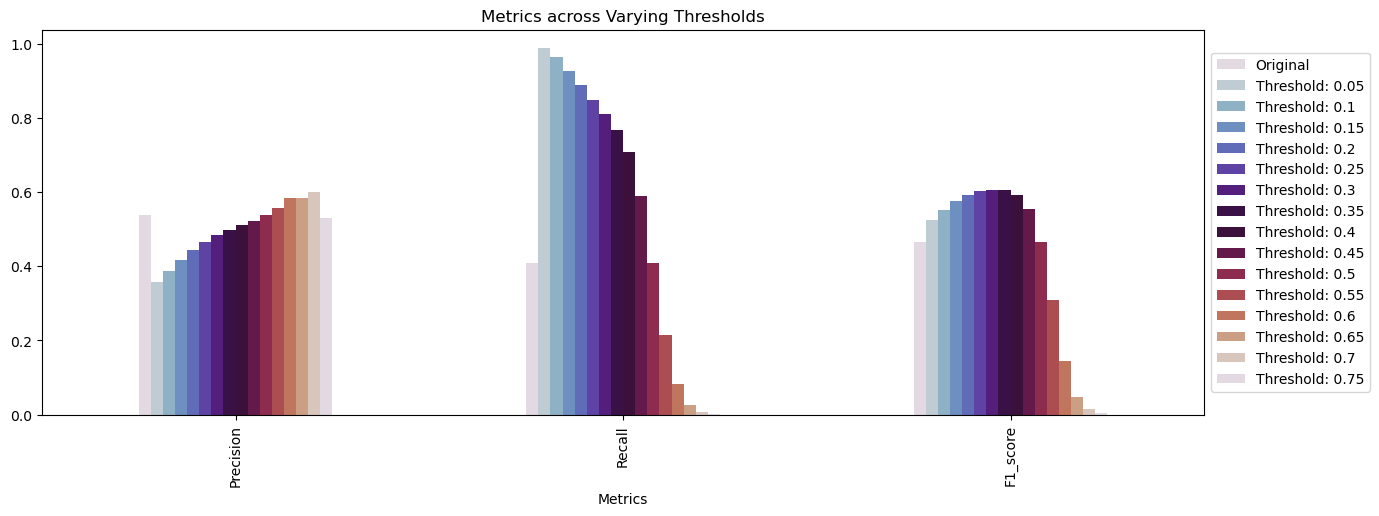

In [20]:
adj_threshold.plot(x='Metrics',
        kind='bar',
        stacked=False,
        title='Metrics across Varying Thresholds',
        figsize=(15, 5),
        cmap = 'twilight').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

# New Classifier with Optimal Threshold

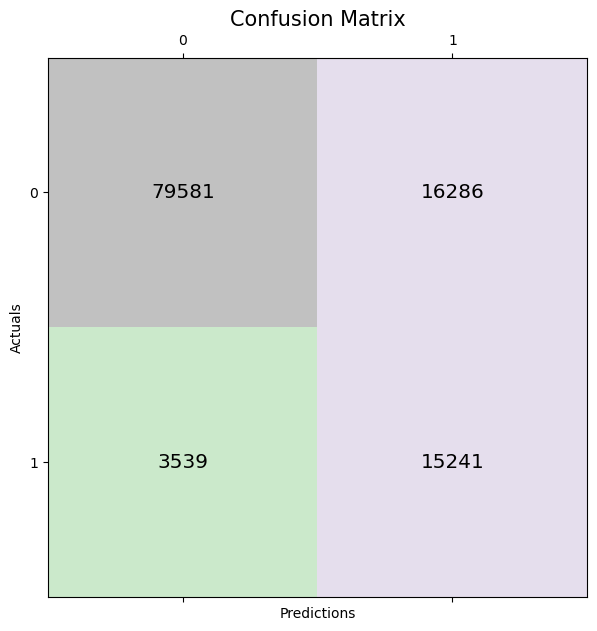

In [21]:
y_pred_new_threshold = (xgb_classifier.predict_proba(X_test)[:,1]>=0.3).astype(int)


conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_new_threshold)

fig, ax = plt.subplots(figsize=(7, 7))
ax.matshow(conf_matrix, cmap=plt.cm.Accent, alpha=0.4)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [22]:
precision_changedthreshold =  round(precision_score(y_test, y_pred_new_threshold), 4)
recall_changedthreshold = round(recall_score(y_test, y_pred_new_threshold), 4)
F1_changedthreshold =  round(f1_score(y_test, y_pred_new_threshold), 4)
metrics_changedthreshold = [precision_changedthreshold, recall_changedthreshold, F1_changedthreshold]

changedthreshold = pd.DataFrame(list(zip(metrics_original, metrics_changedthreshold)))
changedthreshold.index = ['Precision', 'Recall', 'F1_score']
changedthreshold.columns = ['Original Dataset', 'Threshold Changed Dataset']
changedthreshold

,Original Dataset,Threshold Changed Dataset
Precision,0.5388,0.4834
Recall,0.4094,0.8116
F1_score,0.4652,0.6059


# Oversampling

In [23]:
#Oversampling
train_data=pd.concat([X_train,y_train],axis=1)

Response_Zero=train_data[train_data.Response==0]
Response_One=train_data[train_data.Response==1]

upsampled_One = resample(Response_One,
                          replace=True, # sample with replacement
                          n_samples=len(Response_Zero), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([Response_Zero, upsampled_One])

In [24]:
#Distribution of data in the train set before over-sampling
y_train.value_counts()

Response
0    223686
1     43821
Name: count, dtype: int64

In [25]:
#Distribution of data in the train set after over-sampling
upsampled['Response'].value_counts()

Response
0    223686
1    223686
Name: count, dtype: int64

In [26]:
#Training the model on up-sampled data
X_train_upsampled = upsampled.drop(columns = ['Response'])
y_train_upsampled = upsampled['Response']

xgb_upsampled = xgb.XGBClassifier()

xgb_upsampled.fit(X_train_upsampled,y_train_upsampled)

train_upsampled = xgb_upsampled.predict(X_train_upsampled)
test_upsampled = xgb_upsampled.predict(X_test)

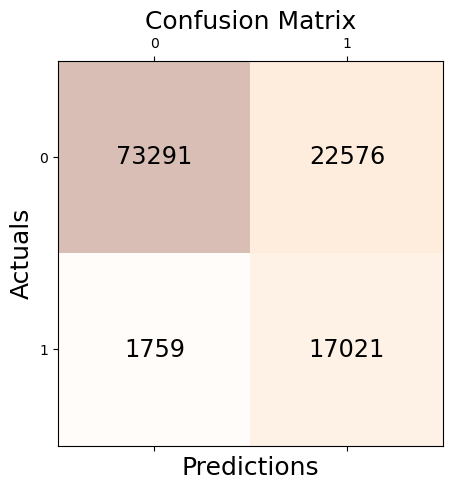

In [27]:
#Confusion matrix on the test set
conf_matrix = confusion_matrix(y_true=y_test, y_pred=test_upsampled)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [28]:
#New efficacy metrics
precision_upsampled =  round(precision_score(y_test, test_upsampled), 4)
recall_upsampled = round(recall_score(y_test, test_upsampled), 4)
F1_upsampled =  round(f1_score(y_test, test_upsampled), 4)
metrics_upsampled = [precision_upsampled, recall_upsampled, F1_upsampled]

upsampled = pd.DataFrame(list(zip(metrics_original, metrics_changedthreshold, metrics_upsampled)))
upsampled.index = ['Precision', 'Recall', 'F1_score']
upsampled.columns = ['Original Dataset', 'Threshold = 0.3', 'Upsampled Dataset']
upsampled

,Original Dataset,Threshold = 0.3,Upsampled Dataset
Precision,0.5388,0.4834,0.4299
Recall,0.4094,0.8116,0.9063
F1_score,0.4652,0.6059,0.5831


# Undersampling

In [29]:
#down-sampling
downsampled_Zero = resample(Response_Zero,
                                replace = False, # sample without replacement
                                n_samples = len(Response_One), # match minority n
                                random_state = 27) # reproducible results

#combine minority and downsampled majority
downsampled = pd.concat([downsampled_Zero, Response_One])

In [30]:
#Distribution of majority and minority classes 
y_train.value_counts()

Response
0    223686
1     43821
Name: count, dtype: int64

In [31]:
#Distribution of both the classes after down-sampling
downsampled['Response'].value_counts()

Response
0    43821
1    43821
Name: count, dtype: int64

In [32]:
#Training the model on down-sampled data and testing on the original test dataset
X_train_downsampled = downsampled.drop(columns = ['Response'])
y_train_downsampled = downsampled['Response']

xgb_downsampled = xgb.XGBClassifier()

xgb_downsampled.fit(X_train_downsampled,y_train_downsampled)

train_downsampled = xgb_downsampled.predict(X_train_downsampled)
test_downsampled = xgb_downsampled.predict(X_test)

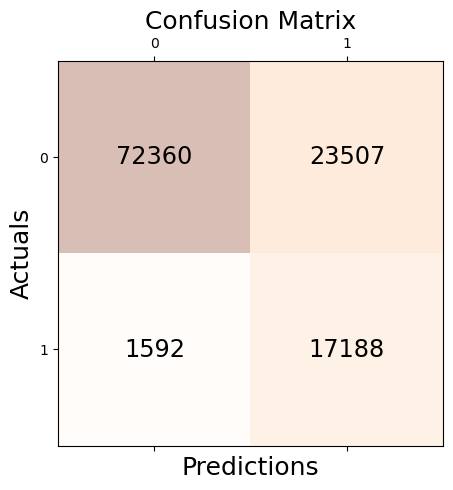

In [33]:
#Confusion metrics of the model built on down-sampled data
conf_matrix = confusion_matrix(y_true=y_test, y_pred=test_downsampled)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [34]:
#Final Metrics

precision_downsampled =  round(precision_score(y_test, test_downsampled), 4)
recall_downsampled = round(recall_score(y_test, test_downsampled), 4)
F1_downsampled =  round(f1_score(y_test, test_downsampled), 4)
metrics_downsampled = [precision_downsampled, recall_downsampled, F1_downsampled]

downsampled = pd.DataFrame(list(zip(metrics_original, metrics_changedthreshold,  metrics_upsampled, metrics_downsampled)))
downsampled.index = ['Precision', 'Recall', 'F1_score']
downsampled.columns = ['Original Dataset', 'Threshold = 0.3', 'Upsampled Dataset', 'Downsampled Dataset']
downsampled

,Original Dataset,Threshold = 0.3,Upsampled Dataset,Downsampled Dataset
Precision,0.5388,0.4834,0.4299,0.4224
Recall,0.4094,0.8116,0.9063,0.9152
F1_score,0.4652,0.6059,0.5831,0.5780
